In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import EAAcFCM

In [2]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

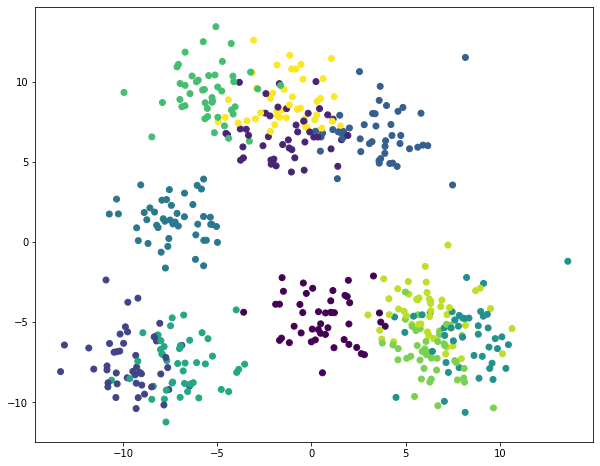

In [3]:
X, y = make_blobs(n_samples=500, centers=11, cluster_std=1.5, random_state=100)
plot_datapoints(X, y)

In [4]:
model = EAAcFCM(X, 12)
model.run(10)

0) Best Individual: V_XB - 0.06406983395855943, Clusters - 3
1) Best Individual: V_XB - 0.06406984786857059, Clusters - 3
2) Best Individual: V_XB - 0.0640698339587758, Clusters - 3
3) Best Individual: V_XB - 0.0640698478685707, Clusters - 3
4) Best Individual: V_XB - 0.06406983395839297, Clusters - 3
5) Best Individual: V_XB - 0.06406984786841743, Clusters - 3
6) Best Individual: V_XB - 0.06406984786850965, Clusters - 3
7) Best Individual: V_XB - 0.06406983395850084, Clusters - 3
8) Best Individual: V_XB - 0.06406983396294075, Clusters - 3
9) Best Individual: V_XB - 0.06406983395876233, Clusters - 3
